In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime
from datetime import date
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
#Create engine for hawaii data
database_path = "../Resources/hawaii.sqlite"
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [10]:
#Inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
#Get column names and types in 'measurement' table
columns_measure = inspector.get_columns('measurement')
for measure in columns_measure:
    print(measure["name"], measure["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#Get column names and types in 'station' table
columns_station = inspector.get_columns('station')
for station in columns_station:
    print(station["name"], station["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#Select and display rows from 'measurement' table
engine.execute('SELECT * FROM Measurement').fetchmany(10)

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [14]:
#create dataframe of 'measurement' table for additional analysis as needed
measurement_df = pd.read_sql("SELECT * FROM Measurement",conn)
measurement_df.set_index("id", inplace=True)
measurement_df.head()

,station,date,prcp,tobs
id,,,,
1,USC00519397,2010-01-01,0.08,65.0
2,USC00519397,2010-01-02,0.00,63.0
3,USC00519397,2010-01-03,0.00,74.0
4,USC00519397,2010-01-04,0.00,76.0
5,USC00519397,2010-01-06,NaN,73.0


In [15]:
#Check if there are any Nan. Looks like prcp has NaNs
measurement_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19550 entries, 1 to 19550
Data columns (total 4 columns):
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null float64
dtypes: float64(2), object(2)
memory usage: 763.7+ KB


In [16]:
#Select and display rows from 'station' table
engine.execute('SELECT * FROM Station').fetchmany(15)

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
#create dataframe of 'station' table 
station_df = pd.read_sql("SELECT * FROM Station",conn)
station_df.set_index("id", inplace=True)

station_df.head(9)

,station,name,latitude,longitude,elevation
id,,,,,
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [18]:
latest_date=session.query(func.max(Measurement.date)).all()

latest_date

[('2017-08-23')]

In [19]:
past_date=dt.date(2017,8,23) - dt.timedelta(days=365)

past_date

datetime.date(2016, 8, 23)

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the date and precipitation scores

precipitation=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between("2016-08-23", "2017-08-23")).all()

#precipitation



In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precipitation_df=pd.DataFrame(precipitation,columns=["date","precipitation"])
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df.set_index("date", inplace=True)
precipitation_df.sort_values(by="date")
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [22]:
#DataFrame statistics
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


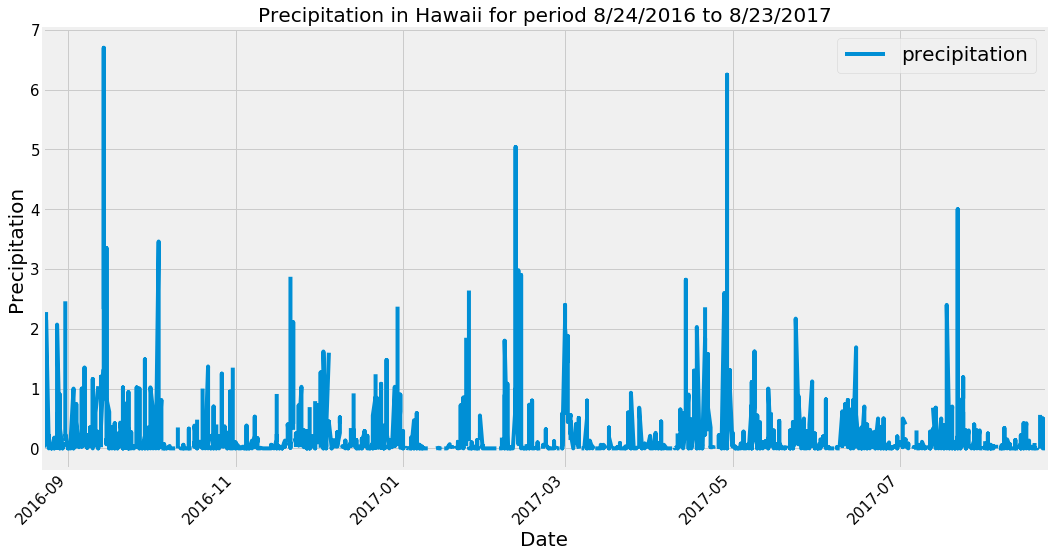

In [23]:
#Create plot

precipitation_plot=precipitation_df.plot(figsize=(16,9), sort_columns=True, use_index=True, legend=True, grid=True,rot=45)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Precipitation", fontsize=20)
plt.title("Precipitation in Hawaii for period 8/24/2016 to 8/23/2017",size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(prop={'size':20})

plt.savefig("Precipitation in Hawaii")
plt.show()

In [24]:
# Design a query to show how many stations are available in this dataset?
station=session.query(Station.id).count()
print(f'There are {station} stations in this dataset.')

There are 9 stations in this dataset.


In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations=session.query(Measurement.station,Station.name,func.count(Measurement.tobs)).\
    filter(Measurement.station == Station.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

active_stations



[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [26]:
#Select the first row and its three records to capture the most active station
station_most_active=active_stations[0][0:2]

print(f'The most active station is {station_most_active}.')

The most active station is ('USC00519281', 'WAIHEE 837.5, HI US').


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temps=session.query(Station.name,
                    func.min(Measurement.tobs),
                    func.max(Measurement.tobs),
                    func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(f'Lowest temp is {temps[0][1]}.\nHighest temp is {temps[0][2]}. \nAverage temp is {round(temps[0][3],2)}.')

Lowest temp is 54.0.
Highest temp is 85.0. 
Average temp is 71.66.


In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highest_observation=session.query(Measurement.tobs).\
    filter(Measurement.date.between("2016-08-24", "2017-08-23")).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs).all()

#highest_observation


In [29]:
#Convert to dataframe
highest_observation_df=pd.DataFrame(highest_observation,columns=["temp"])

highest_observation_df.head()

,temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


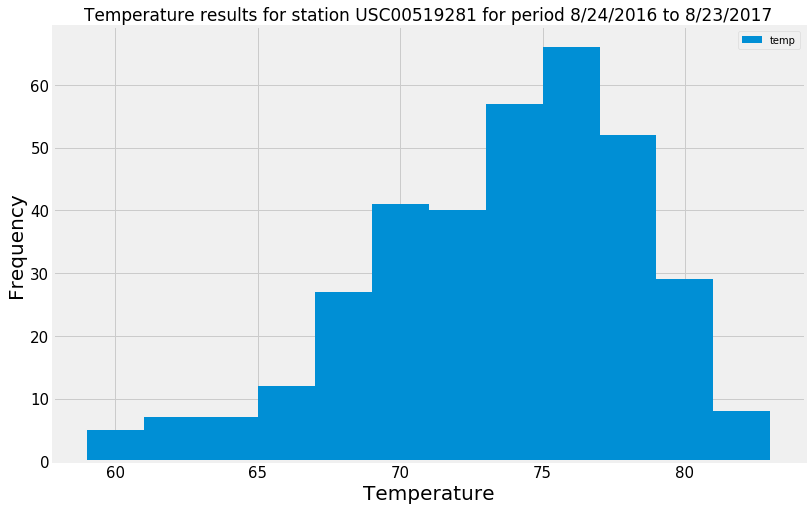

In [30]:
#Plot histogram
plt.subplots(figsize=(12,8))

plt.hist(highest_observation_df['temp'], bins=12)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.title("Temperature results for station USC00519281 for period 8/24/2016 to 8/23/2017",size=17)
plt.legend(["temp"])
plt.xticks(size=15)
plt.yticks(size=15)

plt.savefig("Histogram Active Station")
plt.show()